In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [2]:
iris = pd.read_csv('./iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
email = pd.read_csv('./emails.csv')
email.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
X = iris.iloc[:, 0:4]
y = iris.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
kfold = KFold(n_splits=5)
model = GaussianNB()
results_gauss_iris = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
mean_score_gauss_iris = results_gauss_iris.mean()

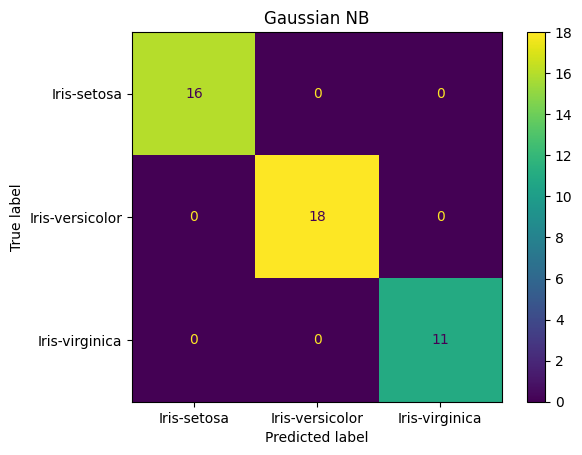

In [6]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Gaussian NB')
plt.show()

In [7]:
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
metrics = classification_report(y_test, predictions, target_names=target_names)
print(metrics)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [8]:
kfold = KFold(n_splits=5)
model = MultinomialNB()
results_multi_iris = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
mean_score_multi_iris = results_multi_iris.mean()

In [10]:
metrics = classification_report(y_test, predictions, target_names=target_names)
print(metrics)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.00      0.00      0.00        18
 Iris-virginica       0.38      1.00      0.55        11

       accuracy                           0.60        45
      macro avg       0.46      0.67      0.52        45
   weighted avg       0.45      0.60      0.49        45



c:\Users\ianjo\miniconda2\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ianjo\miniconda2\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ianjo\miniconda2\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
X = email.iloc[:, 1:3000]
y = email.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
kfold = KFold(n_splits=5, shuffle=False)
model = GaussianNB()
results_gauss_emails = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
mean_score_gauss_emails = results_gauss_emails.mean()

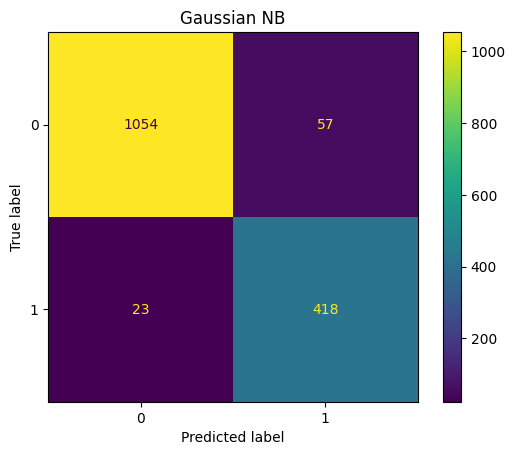

In [24]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Gaussian NB')
plt.show()

In [25]:
target_names = [' No SPAM', 'SPAM']
metrics = classification_report(y_test, predictions, target_names=target_names)
print(metrics)

              precision    recall  f1-score   support

     No SPAM       0.98      0.95      0.96      1111
        SPAM       0.88      0.95      0.91       441

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552



In [15]:
kfold = KFold(n_splits=5, shuffle=False)
model = MultinomialNB()
results_multi_emails = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
mean_score_multi_emails = results_multi_emails.mean()

In [17]:
metrics = classification_report(y_test, predictions, target_names=target_names)
print(metrics)

              precision    recall  f1-score   support

     No SPAM       0.98      0.94      0.96      1111
        SPAM       0.86      0.95      0.90       441

    accuracy                           0.94      1552
   macro avg       0.92      0.94      0.93      1552
weighted avg       0.94      0.94      0.94      1552



In [18]:
accuracies = [val for val in results_gauss_iris]
accuracies.append(mean_score_gauss_iris)

for val in results_multi_iris:
    accuracies.append(val)

accuracies.append(mean_score_multi_iris)

for val in results_gauss_emails:
    accuracies.append(val)

accuracies.append(mean_score_gauss_emails)

for val in results_multi_emails:
    accuracies.append(val)

accuracies.append(mean_score_multi_emails)

In [19]:
results_table = [[
            'iris.csv', 'iris.csv', 'iris.csv',
            'iris.csv', 'iris.csv', 'iris.csv',
            'iris.csv', 'iris.csv', 'iris.csv',
            'iris.csv', 'iris.csv', 'iris.csv',
            'emails.csv', 'emails.csv', 'emails.csv',
            'emails.csv', 'emails.csv', 'emails.csv',
            'emails.csv', 'emails.csv', 'emails.csv',
            'emails.csv', 'emails.csv', 'emails.csv',
           ],
            [
                5, 5, 5, 5, 5, 5,
                5, 5, 5, 5, 5, 5,
                5, 5, 5, 5, 5, 5,
                5, 5, 5, 5, 5, 5
            ],
            [
                'Normal', 'Normal', 'Normal',
                'Normal', 'Normal', 'Normal',
                'Multinomial', 'Multinomial', 'Multinomial',
                'Multinomial', 'Multinomial', 'Multinomial',
                'Normal', 'Normal', 'Normal',
                'Normal', 'Normal', 'Normal',
                'Multinomial', 'Multinomial', 'Multinomial',
                'Multinomial', 'Multinomial', 'Multinomial'
            ],
            [
                '1', '2', '3', '4', '5', 'Promedio',
                '1', '2', '3', '4', '5', 'Promedio',
                '1', '2', '3', '4', '5', 'Promedio',
                '1', '2', '3', '4', '5', 'Promedio'
            ]
]
index = pd.MultiIndex.from_arrays(results_table, names = ('Dataset', 'No. Pliegues', 'Distribución', 'Pliegue'))
report = pd.DataFrame({'Accuracy': accuracies}, index=index)
report

Accuracy
Dataset    No. Pliegues Distribución Pliegue           
iris.csv   5            Normal       1         0.857143
                                     2         0.952381
                                     3         1.000000
                                     4         1.000000
                                     5         0.904762
                                     Promedio  0.942857
                        Multinomial  1         0.571429
                                     2         0.714286
                                     3         0.952381
                                     4         0.666667
                                     5         0.571429
                                     Promedio  0.695238
emails.csv 5            Normal       1         0.947514
                                     2         0.957182
                                     3         0.950276
                                     4         0.951657
                                     5         0.944751
                                     Promedio  0.950276
                        Multinomial  1         0.951657
                                     2         0.944751
                                     3         0.943370
                                     4         0.946133
                                     5         0.943370
                                     Promedio  0.945856

In [20]:
tablet = {
    'Dataset': [ 'iris.csv', 'emails.csv' ],
    'Distribución': ['Normal', 'Normal'],
    'Accuracy': [1, 0.95]
}

final_results = pd.DataFrame(tablet)
final_results

,Dataset,Distribución,Accuracy
0,iris.csv,Normal,1.00
1,emails.csv,Normal,0.95
